In [1]:
import numpy as np
import pandas as pd
from mplsoccer import FontManager, add_image
from PIL import Image

In [2]:
font_normal = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Regular.ttf?raw=true"
))
font_bold = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Bold.ttf?raw=true"
))
font_medium = FontManager((
    "https://github.com/google/fonts/blob/main/apache/robotoslab/static/RobotoSlab-Medium.ttf?raw=true"
))
font_italic = FontManager((
    "https://github.com/google/fonts/blob/main/apache/arimo/static/Arimo-Italic.ttf?raw=true"
))

In [3]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

In [4]:
df = pd.read_excel("../_data_/femeni/barca_femeni.xlsx")

df["Min%"] = ((np.round(df["Minutes played"] / (35*90) * 100, 0)).astype(str).str[:-2]).astype(int)
df["Player"] = df["Player"] + ' (' + df["Age"].astype(str) + ')'

df.loc[21, "Min%"] = 1

df = df.sort_values(by="Min%", ascending=False).reset_index(drop=True)

In [5]:
df

Jersey Number                  Player  Age  Accurate passes  InStat Index  \
0            11.0    Alexia Putellas (27)   27           1772.0         297.0   
1             4.0         Maria Leon (25)   25           2531.0         256.0   
2             8.0     Marta Torrejon (31)   31           2046.0         268.0   
3             9.0  Mariona Caldentey (25)   25           1903.0         270.0   
4            17.0     Andrea Pereira (27)   27           2048.0         246.0   
5             NaN       Sandra Paños (28)   28              NaN           NaN   
6            12.0  Patricia Guijarro (22)   22           1902.0         274.0   
7            16.0    Caroline Hansen (26)   26            922.0         304.0   
8            14.0     Aitana Bonmati (23)   23           1515.0         264.0   
9            15.0      Leila Ouahabi (28)   28           1292.0         243.0   
10            7.0    Jenifer Hermoso (31)   31            937.0         266.0   
11           22.0      Lieke Martens (28)   28            793.0         267.0   
12           20.0     Asisat Oshoala (26)   26            202.0         234.0   
13            5.0    Melanie Serrano (31)   31           1591.0         263.0   
14            6.0       Vicky Losada (30)   30           1177.0         241.0   
15           10.0    Kheira Hamraoui (31)   31           1212.0         247.0   
16           18.0   Ana Crnogorcevic (30)   30            698.0         236.0   
17            NaN          Cata Coll (20)   20              NaN           NaN   
18           23.0     Jana Fernandez (19)   19            559.0         231.0   
19           24.0     Bruna Vilamala (18)   18            111.0         238.0   
20            3.0        Laia Codina (21)   21            295.0         220.0   
21           21.0      Andrea Falcón (24)   24             94.0         211.0   
22           33.0       Emma Gorgoso (19)   19             59.0         225.0   
23           32.0   Ariadna Mingueza (18)   18              4.0         175.0   

    Matches played  Minutes played Starting lineup appearances Substitute out  \
0             38.0            2966                          33             13   
1             35.0            2943                          33              8   
2             38.0            2863                          32             15   
3             39.0            2769                          31             16   
4             34.0            2734                          30             10   
5              NaN            2326                         NaN            NaN   
6             33.0            2314                          26             13   
7             31.0            2295                          28             17   
8             37.0            2235                          25             14   
9             31.0            1972                          20              8   
10            30.0            1971                          21             13   
11            31.0            1956                          21             13   
12            33.0            1918                          20             14   
13            29.0            1709                          19             11   
14            35.0            1630                          14              7   
15            31.0            1607                          16             10   
16            26.0            1178                           9              2   
17             NaN             810                         NaN            NaN   
18            13.0             626                           5              1   
19            12.0             455                           3              1   
20             8.0             349                           3              1   
21            10.0             197                           -              -   
22             3.0              79                           1              1   
23             1.0              14

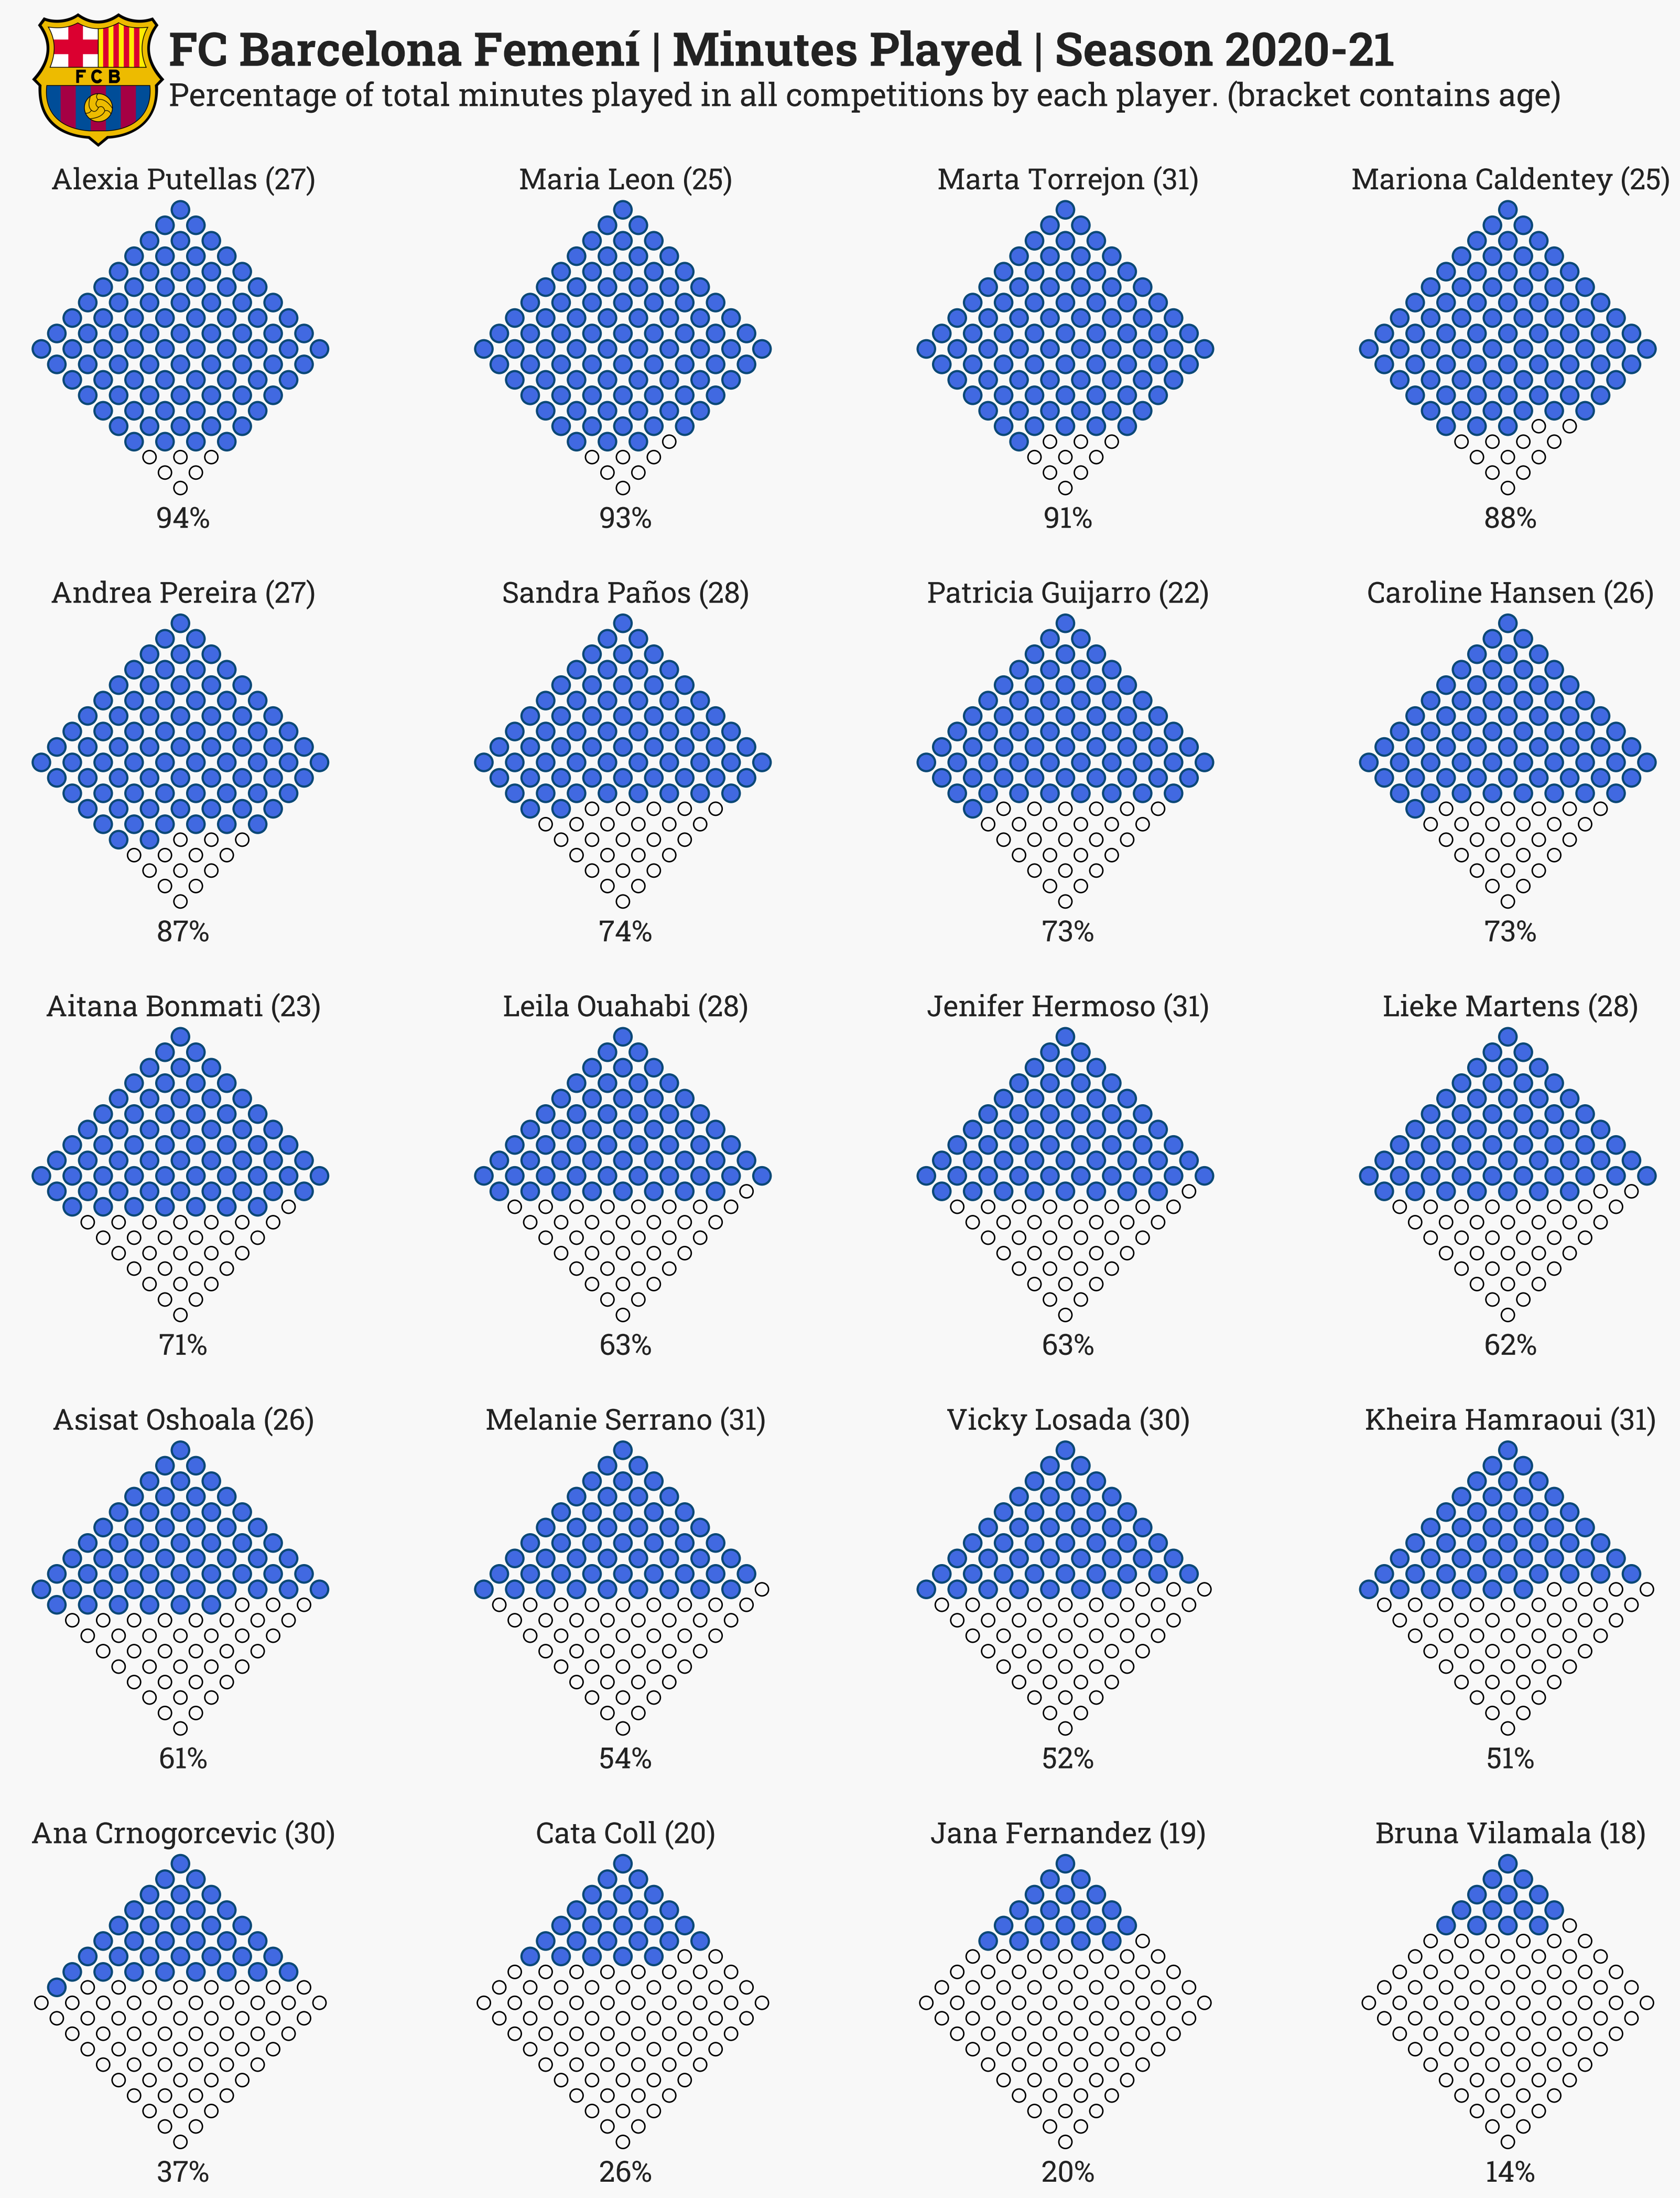

In [11]:
%run ../src/waffle.py
%run ../src/my_utils.py

# hex-code
background_color = "#F8F8F8"
text_color = "#222222"

point_list = df["Min%"].values
player_list = df["Player"].values

coord_list = get_coord_list()
coord_list = coord_after_rotation(coord_list)
fig, ax = make_waffle(5, 4, (28, 24), 20, coord_list, point_list, player_list, background_color, font_normal)

_ = add_image(Image.open("../logos/Barcelona.png"), fig, 0.213, 0.91, 0.07, 0.055)

s = "Percentage of total minutes played in all competitions by each player. (bracket contains age)"

plot_text_fig(fig, foreground="#F8F8F8", x=0.272, y=0.943, s="FC Barcelona Femení | Minutes Played | Season 2020-21", size=32, color="#222222", fontproperties=font_bold.prop)
plot_text_fig(fig, foreground="#F8F8F8", x=0.272, y=0.927, s=s, size=22, color="#222222", fontproperties=font_normal.prop)

s = "Correct until May 16, 2021"
s2 = "Inspired By: UtdArena / @utdarena\nViz Author: Anmol Durgapal / @slothfulwave612"

# plot_text_fig(fig, foreground="#F8F8F8", x=0.225, y=0.07, s=s, size=15, color="#222222", fontproperties=font_normal.prop)
# plot_text_fig(fig, foreground="#F8F8F8", x=0.78, y=0.07, s=s2, size=15, color="#222222", fontproperties=font_normal.prop, ha="right")

plt.subplots_adjust(hspace=0.15, wspace=0.02)


In [12]:
fig.savefig("a.jpg", dpi=200, bbox_inches="tight")

In [403]:
temp_df

Player     Age   Min  Min%
5      Clément Lenglet (25)  25-313  3342    75
12  Martin Braithwaite (29)  29-325  1661    37
17                Neto (31)  31-281  1020    23
18        Junior Firpo (24)  24-247   829    18
20       Samuel Umtiti (27)  27-163   698    16
24        Carles Aleñá (23)  23-111   172     5

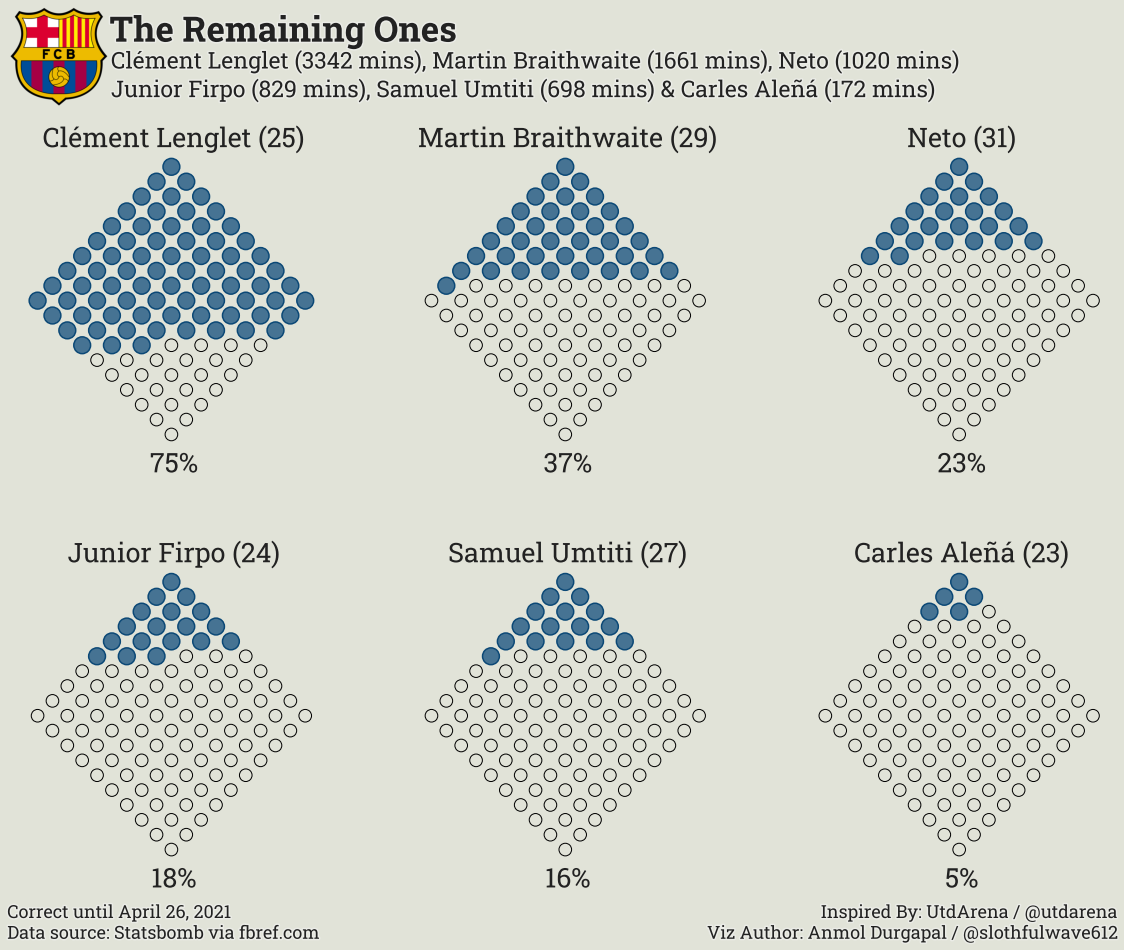

In [418]:
%run ../src/waffle.py
%run ../src/my_utils.py

temp_df = df.loc[
    df["Player"].isin([
        "Clément Lenglet (25)", "Martin Braithwaite (29)", "Neto (31)", "Junior Firpo (24)", "Samuel Umtiti (27)", "Carles Aleñá (23)"
    ])
]

point_list = temp_df["Min%"].values
player_list = temp_df["Player"].values

coord_list = get_coord_list()
coord_list = coord_after_rotation(coord_list)
fig, ax = make_waffle(2, 3, len(temp_df), coord_list, point_list, player_list, "#E1E3D8", font_normal, font_bold, font_normal_)

_ = add_image(Image.open("../logos/Barcelona.png"), fig, 0.115, 0.905, 0.1, 0.1)

s = "Clément Lenglet (3342 mins), Martin Braithwaite (1661 mins), Neto (1020 mins)\nJunior Firpo (829 mins), Samuel Umtiti (698 mins) & Carles Aleñá (172 mins)"

plot_text_fig(fig, foreground="#EBECE7", x=0.20, y=0.97, s="The Remaining Ones", size=35, color="#222222", fontproperties=font_bold.prop)
plot_text_fig(fig, foreground="#EBECE7", x=0.201, y=0.915, s=s, size=23, color="#222222", fontproperties=font_normal.prop)

s = "Correct until April 26, 2021\nData source: Statsbomb via fbref.com"
s2 = "Inspired By: UtdArena / @utdarena\nViz Author: Anmol Durgapal / @slothfulwave612"

plot_text_fig(fig, foreground="#EBECE7", x=0.129, y=0.08, s=s, size=18, color="#222222", fontproperties=font_normal.prop)
plot_text_fig(fig, foreground="#EBECE7", x=0.9, y=0.08, s=s2, size=18, color="#222222", fontproperties=font_normal.prop, ha="right")

# s = "Correct until April 26, 2021\nData source: Statsbomb via fbref.com"
# s2 = s + '\n' + "Inspired By: UtdArena / @utdarena\nViz Author: Anmol Durgapal / @slothfulwave612"

# plot_text_fig(fig, foreground="#EBECE7", x=0.896, y=0.13, s=s2, size=20, color="#222222", fontproperties=font_normal.prop, ha="right")

plt.show()

In [419]:
fig.savefig("../plots/Barcelona/Misc/02_waffle/08_rems.jpg", dpi=400, bbox_inches="tight")

## Heatmap

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import ax_text

from mplsoccer import Pitch, VerticalPitch, FontManager, add_image
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches

In [184]:
# df_1 = pd.read_pickle("../_data_/barca/busi_touches.pkl")
# df_1 = pd.read_pickle("../_data_/barca/busi_2019_20.pkl")

In [185]:
# df_1 = df_1.loc[
#     df_1["type_displayName"].isin(["Tackle", "Interception"])
# ]

df_1 = df_1.loc[
    df_1["outcomeType_displayName"] == "Successful"
].copy()

In [20]:
# df_1 = pd.read_pickle("../_data_/barca/busi_touches_0.pkl")
# df_1 = pd.read_pickle("../_data_/barca/busi_touches_1.pkl")
df_1 = pd.read_pickle("../_data_/barca/busi_touches_2.pkl")

In [186]:
%run ../src/corner_utils.py
%run ../src/my_utils.py

df_1["corner_taken"] = df_1["qualifiers"].apply(lambda x: is_corner_(x))
df_1["free_kick_taken"] = df_1["qualifiers"].apply(lambda x: is_free_kick(x))

df_1 = df_1.loc[
    (df_1["corner_taken"] == False) & 
    (df_1["free_kick_taken"] == False) & 
    (df_1["type_displayName"] != "Foul")
]

In [3]:
# 272A2E
bck_color = "#C4CED8"
line_color = "#404040"
text_color = "#121212"
heat_color = "#B3194B"

In [4]:
cmap = LinearSegmentedColormap.from_list(
    "barca_cmap", ["#222222", "cornflowerblue"], N=100
)

In [13]:
[mpl.colors.rgb2hex(x) for x in cmap._lut][::11]

['#222222',
 '#292f39',
 '#313c4f',
 '#384866',
 '#3f557c',
 '#476293',
 '#4e6fa9',
 '#557bc0',
 '#5d88d6',
 '#6495ed']

In [ ]:
9193178258

In [4]:
cmap = LinearSegmentedColormap.from_list(
    "barca_cmap", [bck_color, heat_color], N=100
)

path_eff = [path_effects.withStroke(linewidth=2, foreground=bck_color)]
path_eff_2 = [path_effects.withStroke(linewidth=4, foreground=bck_color)]

color_list = []

for i in range(cmap.N):
    rgba = cmap(i)
    color_list.append(mpl.colors.rgb2hex(rgba))

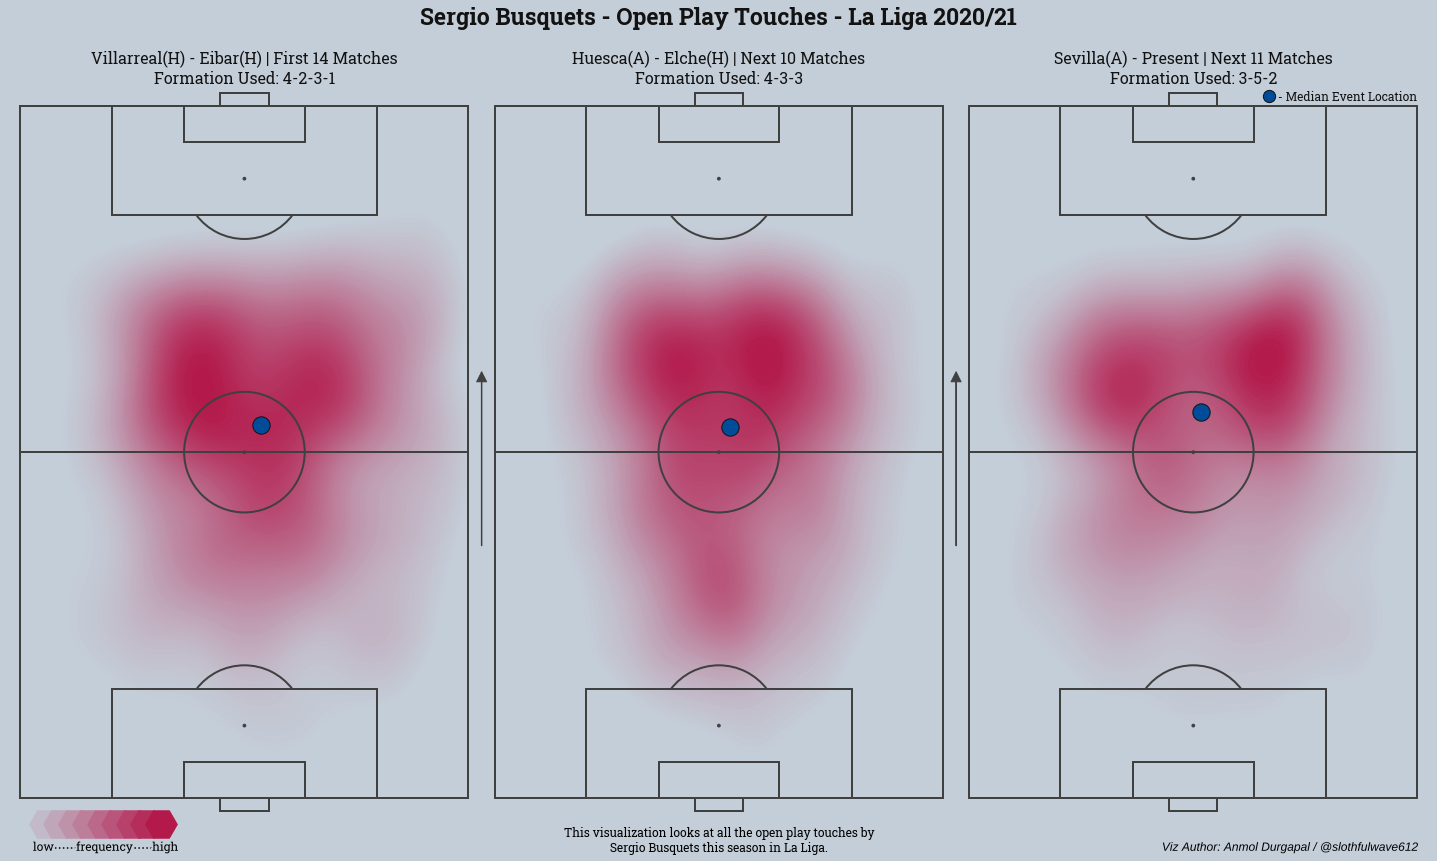

In [234]:
# setup pitch
pitch = VerticalPitch(
    pitch_type="uefa", line_zorder=2, goal_type="box",
    pitch_color=bck_color, line_color=line_color, goal_alpha=1,
    pad_bottom=8, pad_top=12, pad_left=2, pad_right=2,
)

# draw
fig, axes = pitch.grid(
    nrows=1, ncols=3, space=0, figheight=16, title_height=0, endnote_height=0,
)
fig.set_facecolor(bck_color)

style = "Simple, tail_width=0.5, head_width=10, head_length=10"
kw = dict(arrowstyle=style, color=line_color, zorder=5)

collector = zip([df_1, df_2, df_3], axes["pitch"])

for idx, (df, ax) in enumerate(collector):
    df["corner_taken"] = df["qualifiers"].apply(lambda x: is_corner_(x))
    df["free_kick_taken"] = df["qualifiers"].apply(lambda x: is_free_kick(x))

    df = df.loc[
        (df["corner_taken"] == False) & 
        (df["free_kick_taken"] == False) & 
        (df["type_displayName"] != "Foul")
    ].copy()
    
    
    med_x, med_y = df.x.median(), df.y.median()
    
    kdeplot = pitch.kdeplot(df.x, df.y, ax=ax, cmap=cmap, shade=True, levels=100)
    ax.scatter(med_y, med_x, fc="#004C99", ec="#121212", s=300, lw=1)
        
        
    if idx == 0:
        # add arrow
        a1 = patches.FancyArrowPatch((-2,38), (-2,65), **kw)
        ax.add_patch(a1)
        
        # <------- MAKE LEGEND ------->
        kwargs = dict(
            color="#000000", size=12, ha="center", fontproperties=font_normal.prop,
            path_effects=path_eff_2, zorder=4
        )

        # scatter points
        x = 66.5
        for val in color_list[::11]:
            ax.scatter(
                x, -4, s=1000, marker='H', fc=val
            )
            x -= 2.2

        # annotate legend
        ax.text(
            64.5, -8, "low", **kwargs
        )
        ax.text(
            46, -8, "high", **kwargs
        )
        ax.text(
            55.25, -8, "frequency", **kwargs
        )

        # plot line
        ax.plot(
            [64.5, 45], [-7.6, -7.6], color=kwargs["color"], ls=":", zorder=3
        )
        
        ax.text(
            34, 108.5, f"Villarreal(H) - Eibar(H) | First 14 Matches\nFormation Used: 4-2-3-1", ha="center",
            size=16, color=text_color, fontproperties=font_normal.prop
        )

    elif idx == 1:
        # add arrow
        a1 = patches.FancyArrowPatch((-2,38), (-2,65), **kw)
        ax.add_patch(a1)
        a1 = patches.FancyArrowPatch((70,38), (70,65), **kw)
        ax.add_patch(a1)
        
        ax.text(
            34, 108.5, "Huesca(A) - Elche(H) | Next 10 Matches\nFormation Used: 4-3-3", ha="center",
            size=16, color=text_color, fontproperties=font_normal.prop
        )

    elif idx == 2:
        # add arrow
        a1 = patches.FancyArrowPatch((70,38), (70,65), **kw)
        ax.add_patch(a1)
        
        # <------- CREDITS ------->
        ax.text(
            0, -8, "Viz Author: Anmol Durgapal / @slothfulwave612", color="#000000",
            path_effects=path_eff_2, fontproperties=font_italic.prop, ha="right",
            size=12,
        )
        
        # scatter point
        ax.scatter(
            22.5, 106.5, s=150, fc="#004C99", ec="#121212"
        )
        ax.text(
            0, 105.9, "- Median Event Location", ha="right",
            size=12, color=text_color, fontproperties=font_normal.prop
        )
        
        ax.text(
            34, 108.5, "Sevilla(A) - Present | Next 11 Matches\nFormation Used: 3-5-2", ha="center",
            size=16, color=text_color, fontproperties=font_normal.prop
        )

# title and subtitle
title = "Sergio Busquets - Open Play Touches - La Liga 2020/21"
sub_title = "La Liga | Season 2019/20"
desc = "This visualization looks at all the open play touches by\nSergio Busquets this season in La Liga."

# add title
fig.text(
    0.5, 0.86, title, size=23, fontproperties=font_bold.prop, color=text_color, ha="center"
)
# fig.text(
#     0.112, 0.83, sub_title, size=20, fontproperties=font_medium.prop, color=text_color,
# )

# add description
fig.text(
    0.5, 0.1521, desc, size=12, fontproperties=font_normal.prop, color="#000000",
    ha="center", va="center",
)
    
plt.show()

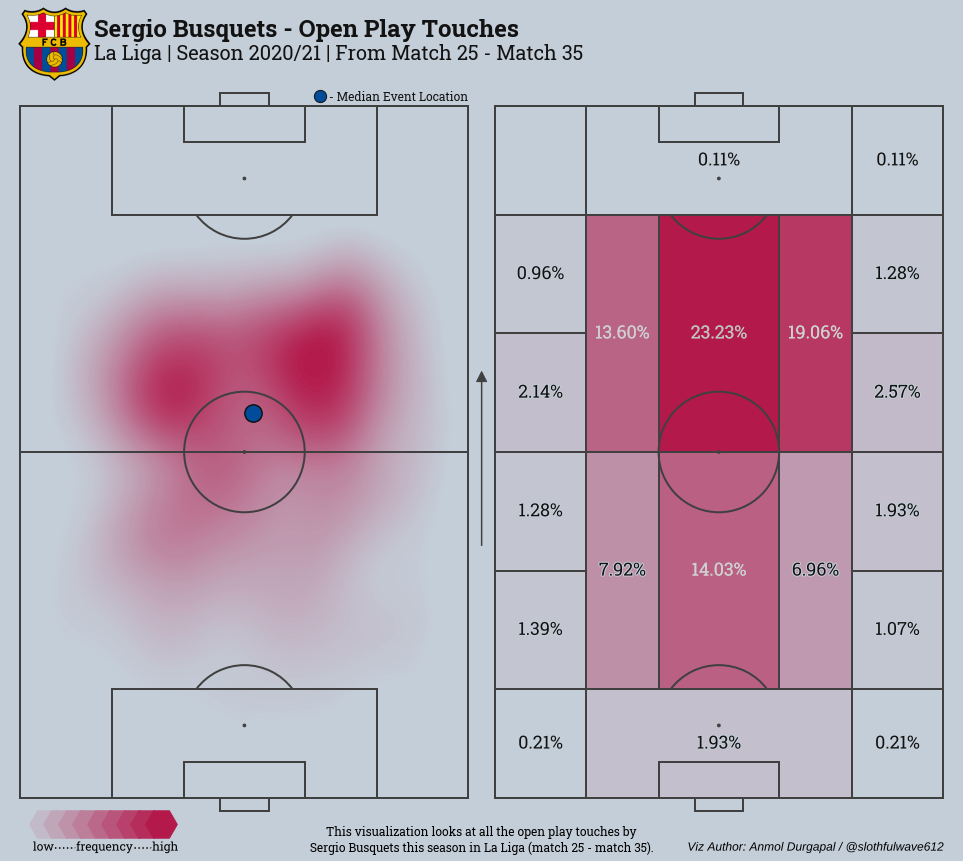

In [21]:
# setup pitch
pitch = VerticalPitch(
    pitch_type="uefa", line_zorder=2, goal_type="box",
    pitch_color=bck_color, line_color=line_color, goal_alpha=1,
    pad_bottom=8, pad_top=12, pad_left=2, pad_right=2,
)

# draw
fig, axes = pitch.grid(
    nrows=1, ncols=2, space=0, figheight=16, title_height=0, endnote_height=0,
)
fig.set_facecolor(bck_color)

style = "Simple, tail_width=0.5, head_width=10, head_length=10"
kw = dict(arrowstyle=style, color=line_color, zorder=5)

for idx, ax in enumerate(axes["pitch"]):
    if idx == 0:
        med_x, med_y = df_1.x.median(), df_1.y.median()
        kdeplot = pitch.kdeplot(df_1.x, df_1.y, ax=ax, cmap=cmap, shade=True, levels=100)
        ax.scatter(med_y, med_x, fc="#004C99", ec="#121212", s=300, lw=1.5)
        
        # add arrow
        a1 = patches.FancyArrowPatch((-2,38), (-2,65), **kw)
        ax.add_patch(a1)
        
        # <------- MAKE LEGEND ------->
        kwargs = dict(
            color="#000000", size=12, ha="center", fontproperties=font_normal.prop,
            path_effects=path_eff_2, zorder=4
        )

        # scatter points
        x = 66.5
        for val in color_list[::11]:
            ax.scatter(
                x, -4, s=1000, marker='H', fc=val
            )
            x -= 2.2

        # annotate legend
        ax.text(
            64.5, -8, "low", **kwargs
        )
        ax.text(
            46, -8, "high", **kwargs
        )
        ax.text(
            55.25, -8, "frequency", **kwargs
        )

        # plot line
        ax.plot(
            [64.5, 45], [-7.6, -7.6], color=kwargs["color"], ls=":", zorder=3
        )
        
        # scatter point
        ax.scatter(
            22.5, 106.5, s=150, fc="#004C99", ec="#121212"
        )
        ax.text(
            0, 105.9, "- Median Event Location", ha="right",
            size=12, color=text_color, fontproperties=font_normal.prop
        )

    else:
        bin_statistic = pitch.bin_statistic_positional(
            df_1.x, df_1.y, statistic='count',
            positional='full', normalize=True
        )
        pitch.heatmap_positional(bin_statistic, ax=ax, cmap=cmap, edgecolors=line_color, lw=2)
        labels = pitch.label_heatmap(
            bin_statistic, color=text_color,
            ax=ax, ha='center', va='center', exclude_zeros=True,
            str_format='{:.2%}', path_effects=path_eff
        )
        
        # add arrow
        a1 = patches.FancyArrowPatch((70,38), (70,65), **kw)
        ax.add_patch(a1)
        
        # <------- CREDITS ------->
        ax.text(
            0, -8, "Viz Author: Anmol Durgapal / @slothfulwave612", color="#000000",
            path_effects=path_eff_2, fontproperties=font_italic.prop, ha="right",
            size=12,
        )

for label in labels:
    if float(label.get_text()[:-1]) > 20:
        label.set_path_effects([path_effects.withStroke(linewidth=0, foreground=heat_color)])
        label.set_color("#C0C0C0")
    elif 10 < float(label.get_text()[:-1]) < 20:
        label.set_path_effects([path_effects.withStroke(linewidth=0, foreground="#c0728b")])
        label.set_color("#CFCFCF")
    
    label.set_font_properties(font_normal.prop)
    label.set_size(18)

# add image
image = Image.open("../logos/Barcelona.png")
add_image(image, fig, 0.035, 0.805, 0.075, 0.075)

# title and subtitle
title = "Sergio Busquets - Open Play Touches"
sub_title = "La Liga | Season 2020/21 | From Match 25 - Match 35"
desc = "This visualization looks at all the open play touches by\nSergio Busquets this season in La Liga (match 25 - match 35)."

# add title
fig.text(
    0.112, 0.85, title, size=24, fontproperties=font_bold.prop, color=text_color,
)
fig.text(
    0.112, 0.83, sub_title, size=20, fontproperties=font_normal.prop, color=text_color,
)

# add description
fig.text(
    0.5, 0.1521, desc, size=12, fontproperties=font_normal.prop, color="#000000",
    ha="center", va="center",
)
    
plt.show()

In [22]:
fig.savefig("../plots/Barcelona/Misc/03_busi/08_last_10.jpg", bbox_inches="tight", dpi=500)

In [95]:
import matplotlib
[matplotlib.colors.rgb2hex(x) for x in cmap._lut][50]

'#c0728b'

## Scatter Plot

In [13]:
import numpy as np
import pandas as pd
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from adjustText import adjust_text
from mplsoccer import add_image
from matplotlib import patches

In [14]:
pd.set_option("display.max_columns", None)

In [15]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

In [16]:
df = pd.read_csv("../_data_/goalkeeper/keeper_laliga.csv")

df["Player"] = df["Player"].apply(lambda x: x.split('\\')[0])

df = df.loc[
    df["90s"] >= 18.0
]

In [17]:
df[["Player", "Squad", "90s", "PSxG", "PSxG+/-"]]

Player            Squad   90s  PSxG  PSxG+/-
1           Sergio Asenjo       Villarreal  35.0  0.97    -0.12
2             Édgar Badía            Elche  30.0  1.52    -0.01
3            Rubén Blanco       Celta Vigo  18.2  1.25    -0.23
4          Yassine Bounou          Sevilla  32.0  0.74     0.05
5           Claudio Bravo            Betis  18.0  1.37     0.14
9        Thibaut Courtois      Real Madrid  36.0  0.82     0.10
10        Marko Dmitrović            Eibar  33.7  1.30    -0.04
11         Jaume Doménech         Valencia  28.0  1.40    -0.03
13        Aitor Fernández          Levante  29.0  1.34    -0.11
14       Álvaro Fernández           Huesca  20.0  1.44    -0.06
18         Sergio Herrera          Osasuna  31.9  1.27     0.17
19       Jeremías Ledesma            Cádiz  32.0  1.21    -0.16
20            Jordi Masip       Valladolid  23.0  1.53     0.05
22              Jan Oblak  Atlético Madrid  36.0  0.84     0.29
23       Fernando Pacheco           Alavés  36.0  1.48    -0.02
25            Álex Remiro    Real Sociedad  36.0  0.86    -0.14
27            Joel Robles            Betis  18.0  1.19    -0.08
30              Rui Silva          Granada  32.0  1.59    -0.10
31             Unai Simón    Athletic Club  36.0  0.96    -0.09
32            David Soria           Getafe  27.0  1.09     0.09
33  Marc-André ter Stegen        Barcelona  30.0  0.94     0.00

In [18]:
df["Player"].unique()

array(['Sergio Asenjo', 'Édgar Badía', 'Rubén Blanco', 'Yassine Bounou',
       'Claudio Bravo', 'Thibaut Courtois', 'Marko Dmitrović',
       'Jaume Doménech', 'Aitor Fernández', 'Álvaro Fernández',
       'Sergio Herrera', 'Jeremías Ledesma', 'Jordi Masip', 'Jan Oblak',
       'Fernando Pacheco', 'Álex Remiro', 'Joel Robles', 'Rui Silva',
       'Unai Simón', 'David Soria', 'Marc-André ter Stegen'], dtype=object)

In [26]:
font_

FontManager(font_url=https://github.com/googlefonts/OswaldFont/blob/main/fonts/ttf/Oswald-Bold.ttf?raw=true)

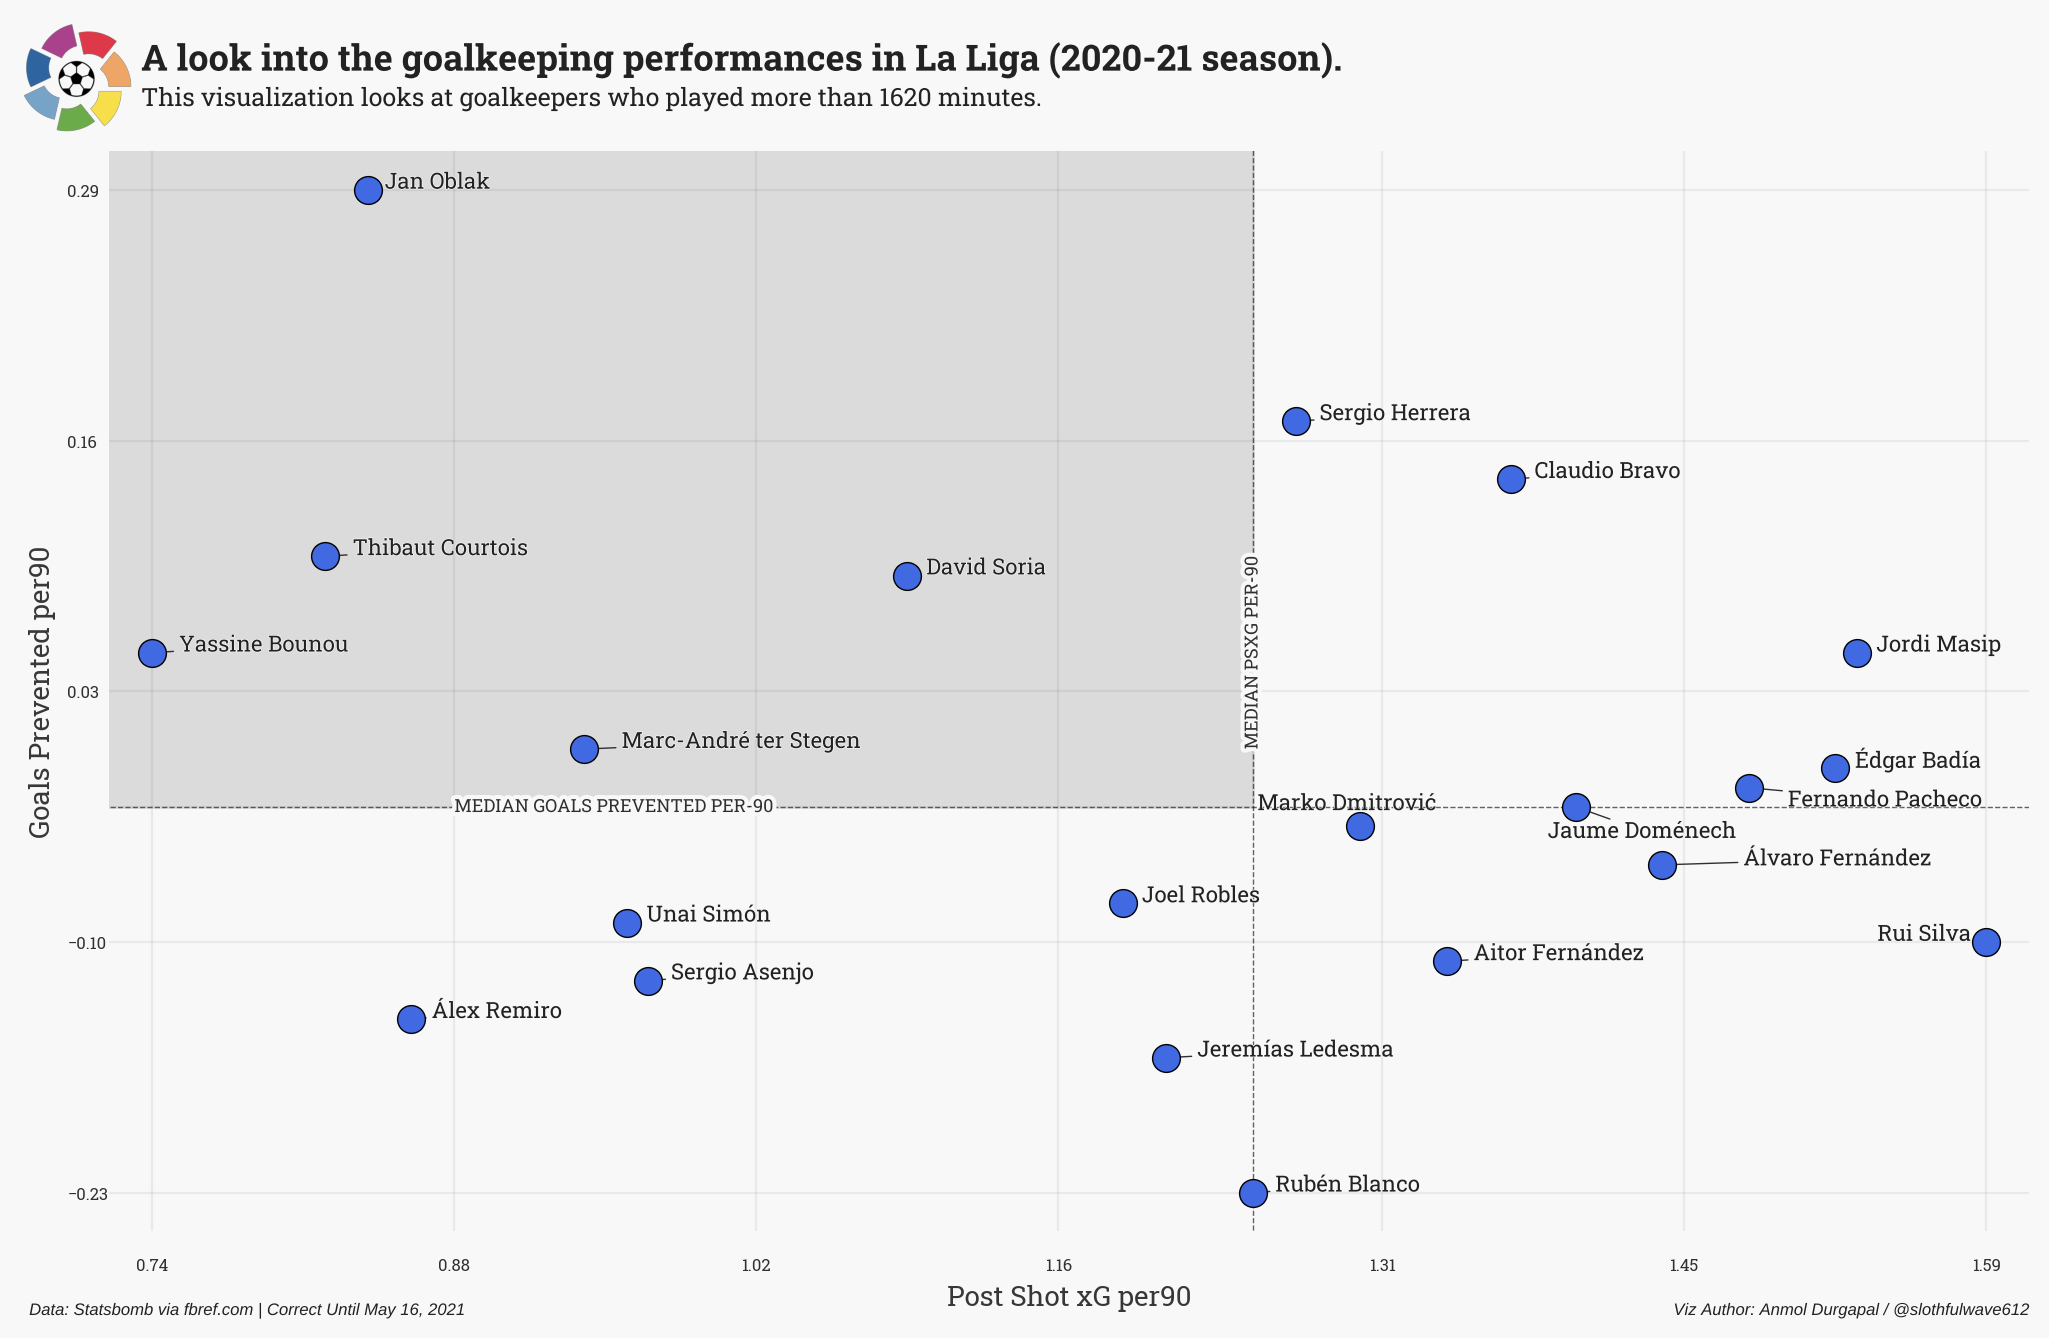

In [24]:
# hex-code: a shade of black
background_color = "#F8F8F8"

# hex-code: a shade of yellow
scatter_color = "royalblue"

# hex-code: a shade of black
secondary_color = "#C0C0C0"

# hex-code: a shade of white
text_color = "#222222"
text_color_2 = "#303030"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(16, 12), dpi=200
)

adjustFigAspect(fig, 16/9)

# set the background color for the axes
ax.set_facecolor(background_color)

# scatter the points
ax.scatter(
    df["PSxG"], df["PSxG+/-"], ec="#000000", s=100, fc=scatter_color, zorder=6, lw=0.5
)

# show y-ticks on right
# ax.yaxis.tick_right()
    
# set xticks and yticks
plt.xticks(np.round(np.linspace(df["PSxG"].min(), df["PSxG"].max(), 7), 2), fontproperties=font_normal.prop, size=7, va="bottom")
plt.yticks(np.linspace(df["PSxG+/-"].min(), df["PSxG+/-"].max(), 5), fontproperties=font_normal.prop, size=7, ha="left")

# turn off the spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# set color for tick-params
ax.tick_params(axis="both", which="both", length=0, colors=text_color_2, pad=15)

font_ = FontManager("https://github.com/googlefonts/OswaldFont/blob/main/fonts/ttf/Oswald-Bold.ttf?raw=true")

for label in ax.get_xticklabels() :
    label.set_fontproperties(font_normal.prop)
    label.set_fontsize(6)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_normal.prop)
    label.set_fontsize(6)

# set the grid
ax.grid(b=True, alpha=0.07, axis="both", color=text_color_2)

# add x-label and y-label
ax.set_xlabel(
    "Post Shot xG per90", color=text_color, ha="center", alpha=0.9,
    fontsize=10, fontproperties=font_normal.prop
)
ax.set_ylabel(
    "Goals Prevented per90", color=text_color, ha="center", alpha=0.9,
    fontsize=10, fontproperties=font_normal.prop,
)

# ax.yaxis.set_label_position("right")


# add player's name

# make an array of text
texts = [
    ax.text(
        val[0], val[1], val[2], 
        size=8, color=text_color, zorder=5, 
        fontproperties=font_normal.prop,
        path_effects=[path_effects.withStroke(linewidth=0.5, foreground=background_color)]
    )for _, val in df[["PSxG", "PSxG+/-", "Player"]].iterrows()
]

# use adjust_text
adjust_text(
    texts, force_points=(6,-1.7),
    arrowprops=dict(arrowstyle="-", color=text_color_2, lw=0.5), save_steps=False,
)

# fetch
median_x = df["PSxG"].median()
median_y = df["PSxG+/-"].median()

# plot medians
ax.plot([median_x, median_x], [-0.28, df["PSxG+/-"].max() + 0.07], color=text_color, ls="--", lw=0.5, alpha=0.7, zorder=1)
ax.plot([0.7, df["PSxG"].max() + 0.06], [median_y, median_y], color=text_color, ls="--", lw=0.5, alpha=0.7, zorder=1)


# add median text
# annotate the median lines --> list containing dict of values for text method
text_values = [
    {
        'x': median_x, 'y': 0.05, 's': "MEDIAN PSXG PER-90", "color": text_color_2, 
        "ha": "center", "va": "center", "rotation": 90, "fontsize": 6.5, "zorder": 2, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    },
    {
        'x': 0.88, 'y': median_y, 's': "MEDIAN GOALS PREVENTED PER-90", "color": text_color_2, 
        "ha": "left", "va": "center", "fontsize": 6.5, "zorder": 2, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=background_color)]
    }
]

# plot the texts
texts = [ax.text(**txt) for txt in text_values]


# title, sub-title and credits --> list containing dict of values for text method
text_values_ = [
    {
        'x': 0.21, 'y': 0.763, 's': "A look into the goalkeeping performances in La Liga (2020-21 season).", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 13, "fontproperties": font_bold.prop,
        "path_effects": [path_effects.withStroke(linewidth=2, foreground=background_color)]
    },
    {
        'x': 0.21, 'y': 0.747, 's': "This visualization looks at goalkeepers who played more than 1620 minutes.", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 9, "fontproperties": font_normal.prop,
        "path_effects": [path_effects.withStroke(linewidth=2, foreground=background_color)]
    },
    {
        'x': 0.8, 'y': 0.242, 's': "Viz Author: Anmol Durgapal / @slothfulwave612", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 6, "fontproperties": font_italic.prop,
        "path_effects": [path_effects.withStroke(linewidth=2, foreground=background_color)]
    },
    {
        'x': 0.175, 'y': 0.242, 's': "Data: Statsbomb via fbref.com | Correct Until May 16, 2021", "color": text_color, 
        "va": "center", "fontsize": 6, "fontproperties": font_italic.prop,
        "path_effects": [path_effects.withStroke(linewidth=2, foreground=background_color)]
    },
]

# plot the texts
texts_ = [fig.text(**txt) for txt in text_values_]

# add image
image = Image.open("../logos/la_liga_logo.png")
_ = add_image(
    image, fig, 0.165, 0.73, 0.05, 0.05
)

# set axis limit
ax.set(xlim=(0.72, 1.61), ylim=(-0.25,0.31))

# rectangle
rect = patches.Rectangle(
    xy=(0.7, median_y), width=0.55, height=0.5, color="#C0C0C0", alpha=0.5
)
ax.add_patch(rect)


plt.show()

In [25]:
fig.savefig("a.jpg", bbox_inches="tight", dpi=200, pad_inches=0.04)

In [535]:
data = pd.read_excel("../_data_/femeni/barca_femeni.xlsx")

In [536]:
data

Unnamed: 0            Unnamed: 1  Accurate passes  InStat Index  \
0           20        Asisat Oshoala              202           234   
1            8        Marta Torrejon             2046           268   
2           18       A. Crnogorcevic              698           236   
3           16             C. Hansen              922           304   
4            7       Jenifer Hermoso              937           266   
5           33  Emma Ramirez Gorgoso               59           225   
6           10       Kheira Hamraoui             1212           247   
7           21        Andrea Sánchez               94           211   
8           11       Alexia Putellas             1772           297   
9            9       Maria Caldentey             1903           270   
10           5       Melanie Serrano             1591           263   
11          15         Leila Ouahabi             1292           243   
12          17        Andrea Pereira             2048           246   
13           4            Maria Leon             2531           256   
14          23        Jana Fernandez              559           231   
15          22         Lieke Martens              793           267   
16          24  Bruna Vilamala Costa              111           238   
17          14  Aitana Bonmati Conca             1515           264   
18           3   Laia Codina Panedas              295           220   
19          32       Ariadna García                4           175   
20          12     Patricia Guijarro             1902           274   
21           6          Maria Losada             1177           241   

    Matches played  Minutes played Starting lineup appearances Substitute out  \
0               33            1918                          20             14   
1               38            2863                          32             15   
2               26            1178                           9              2   
3               31            2295                          28             17   
4               30            1971                          21             13   
5                3              79                           1              1   
6               31            1607                          16             10   
7               10             197                           -              -   
8               38            2966                          33             13   
9               39            2769                          31             16   
10              29            1709                          19             11   
11              31            1972                          20              8   
12              34            2734                          30             10   
13              35            2943                          33              8   
14              13             626                           5              1   
15              31            1956                          21             13   
16              12             455                           3              1   
17              37            2235                          25             14   
18               8             349                           3              1   
19               1              14                           -              -   
20              33            2314                          26             13   
21              35            1630                          14              7   

    Substitutes in Position Goals Assists Chances Chances successful  \
0               13        F    22       -     101                 24   
1                6       RD     9       6      24                  9   
2               17       RD     2       4      13                  2   
3                3       RM    12      20      39                 14   
4                9        F    28       9      69                 29   
5                2       RD     -       -       -                  -   
6 